In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [3]:
data = pd.read_csv('StudentsPerformance.csv')

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [5]:
data.columns = data.columns.str.replace(" ","_")

In [6]:
data.isna().sum()

gender                         0
race/ethnicity                 0
parental_level_of_education    0
lunch                          0
test_preparation_course        0
math_score                     0
reading_score                  0
writing_score                  0
dtype: int64

In [7]:
data.describe()

,math_score,reading_score,writing_score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [8]:
data.head()

,gender,race/ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [9]:
data['gender'].value_counts()

female    518
male      482
Name: gender, dtype: int64

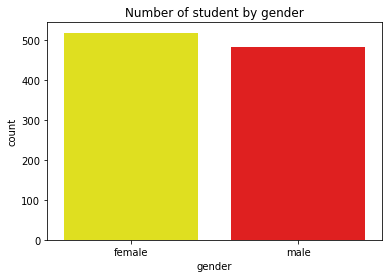

In [10]:
gender = sns.countplot(data = data, x = 'gender', palette={'red','yellow'})
gender.set_title('Number of student by gender')
plt.savefig('Number of student by gender')

The number of female students is greater than male.

In [11]:
data['race/ethnicity'].value_counts()

group C    319
group D    262
group B    190
group E    140
group A     89
Name: race/ethnicity, dtype: int64

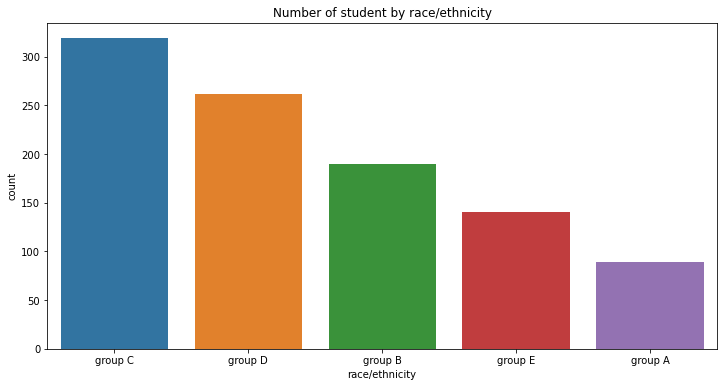

In [12]:
plt.figure(figsize=(12,6))
race = sns.countplot(data = data, x = 'race/ethnicity', order=data['race/ethnicity'].value_counts().index)
race.set_title('Number of student by race/ethnicity')
plt.savefig('a')

Most students are coming from group C

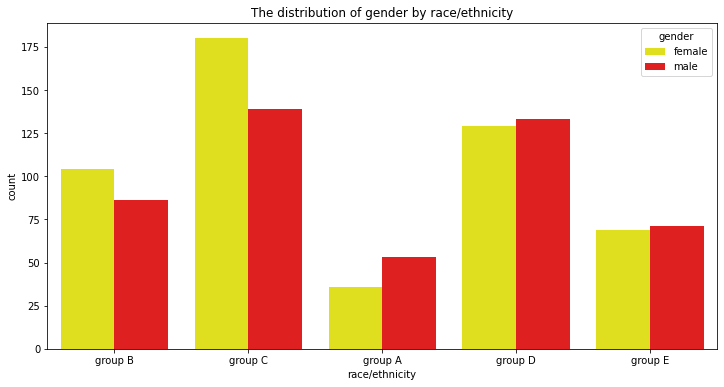

In [13]:
plt.figure(figsize=(12,6))
race_gender = sns.countplot(data = data, x = 'race/ethnicity', hue='gender', palette={'red','yellow'})
race_gender.set_title('The distribution of gender by race/ethnicity')
plt.savefig('b')

The number of female students in group B and C is greater than the male students. 

In [14]:
data['parental_level_of_education'].value_counts()

some college          226
associate's degree    222
high school           196
some high school      179
bachelor's degree     118
master's degree        59
Name: parental_level_of_education, dtype: int64

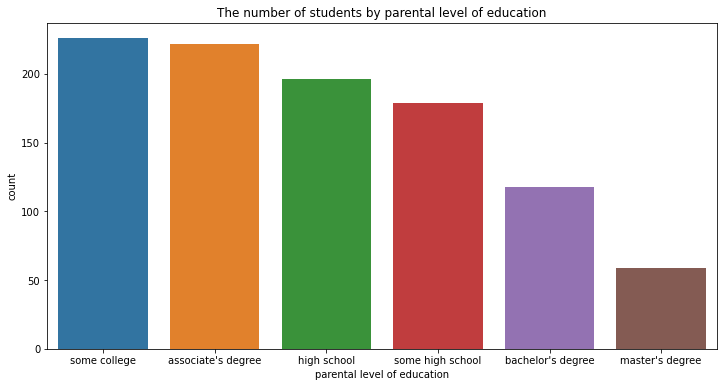

In [15]:
plt.figure(figsize=(12,6))
parental = sns.countplot(data = data, x = 'parental_level_of_education', order=data['parental_level_of_education'].value_counts().index)
parental.set_xlabel('parental level of education')
parental.set_title('The number of students by parental level of education')
plt.savefig('c')

Most of student's parental level of education is some college

In [16]:
lunch = pd.DataFrame(data['lunch'].value_counts().reset_index(name='counts'))
lunch

,index,counts
0,standard,645
1,free/reduced,355


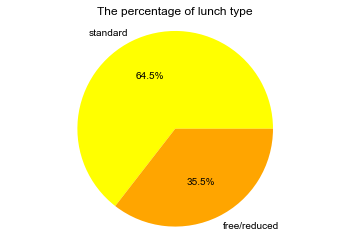

In [17]:
pie_lunch = plt.pie(lunch['counts'], labels=lunch['index'], autopct='%1.1f%%', colors={'orange','yellow'})
sns.set_theme()
plt.axis('equal')
plt.title('The percentage of lunch type')
plt.savefig('The percentage of lunch type')

64.5% student have standard lunch type

In [18]:
preparation = pd.DataFrame(data['test_preparation_course'].value_counts().reset_index(name='counts'))
preparation

,index,counts
0,none,642
1,completed,358


Text(0.5, 1.0, 'The percentage of student takes test preparation course')

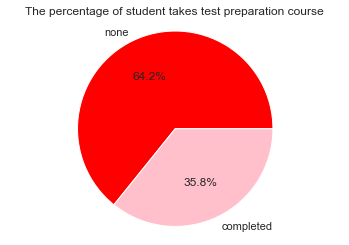

In [19]:
pie_preparation = plt.pie(preparation['counts'], labels=preparation['index'], autopct='%1.1f%%', colors={'red','pink'})
sns.set_theme()
plt.axis('equal')
plt.title('The percentage of student takes test preparation course')

64.2% student doesn't complete or not take the test preparation course

#### The distribution of target variable

<AxesSubplot:xlabel='math_score', ylabel='Density'>

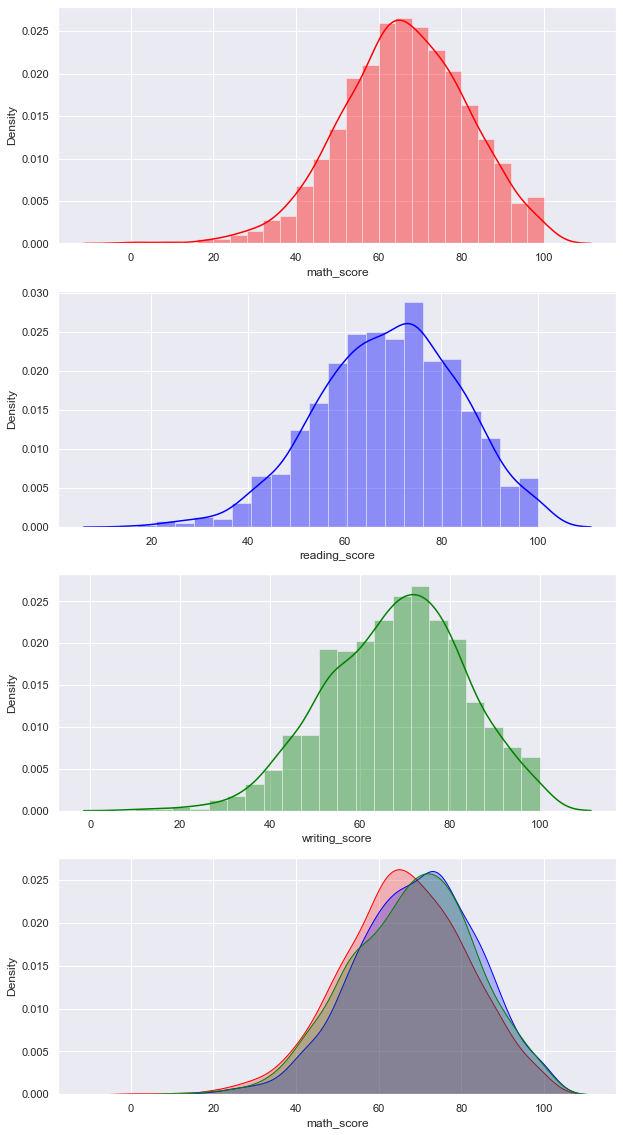

In [20]:
sns.set_theme()
fig, ax = plt.subplots(4,1, figsize=(10,20)) 
plot1 = sns.distplot(data['math_score'], color='red', ax = ax[0])
plot2 = sns.distplot(data['reading_score'], color='blue', ax = ax[1])
plot3 = sns.distplot(data['writing_score'], color='green', ax = ax[2])

sns.kdeplot(data['math_score'], color='red', ax = ax[3], shade=True)
sns.kdeplot(data['reading_score'], color='blue', ax = ax[3], shade=True)
sns.kdeplot(data['writing_score'], color='green', ax = ax[3], shade=True)

We can see that the distribution of the scores is similiar. The scores have high frequency between 40-90. 

<AxesSubplot:>

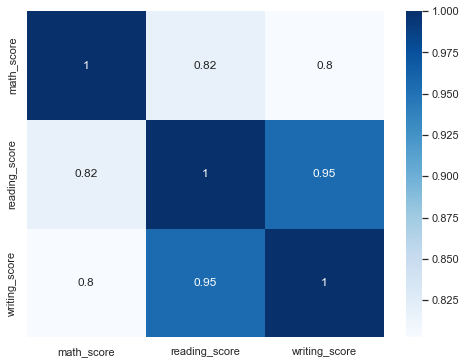

In [21]:
plt.figure(figsize=(8,6))
correlation = data.corr()
sns.heatmap(correlation, cmap = "Blues", annot = True)

Reading and writing scores have high correlaction.

In [22]:
data.head()

,gender,race/ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


##### Analysis scores based on various features

In [52]:
gender_group = data.groupby(by = 'gender').mean()
gender_group

,math_score,reading_score,writing_score
gender,,,
female,63.633205,72.608108,72.467181
male,68.728216,65.473029,63.311203


<AxesSubplot:xlabel='gender'>

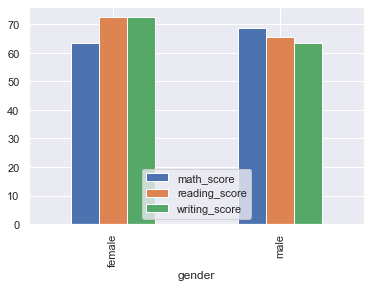

In [53]:
gender_group.plot.bar()

Female student tend to get high score in reading and writing subjects. While male students score more in math

In [56]:
race_group = data.groupby(by = 'race/ethnicity').mean()
race_group

,math_score,reading_score,writing_score
race/ethnicity,,,
group A,61.629213,64.674157,62.674157
group B,63.452632,67.352632,65.600000
group C,64.463950,69.103448,67.827586
group D,67.362595,70.030534,70.145038
group E,73.821429,73.028571,71.407143


<AxesSubplot:xlabel='race/ethnicity'>

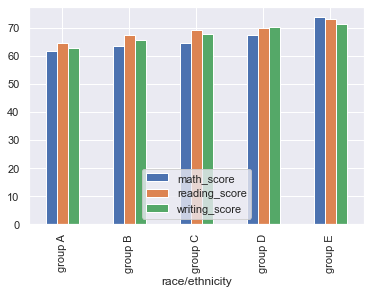

In [57]:
#Barplot
race_group.plot.bar()

Group E tend to get the high scores for all subjects

In [58]:
parental_group = data.groupby(by = 'parental_level_of_education').mean()
parental_group

,math_score,reading_score,writing_score
parental_level_of_education,,,
associate's degree,67.882883,70.927928,69.896396
bachelor's degree,69.389831,73.000000,73.381356
high school,62.137755,64.704082,62.448980
master's degree,69.745763,75.372881,75.677966
some college,67.128319,69.460177,68.840708
some high school,63.497207,66.938547,64.888268


<AxesSubplot:xlabel='parental_level_of_education'>

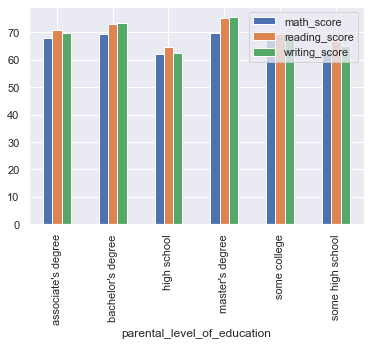

In [59]:
parental_group.plot.bar()

Students score tend to increase as their parent's level of education. Parents having master's degree have a significant impact on students to score more than those parents who only have a high school degree.

In [60]:
lunch_group = data.groupby(by = 'lunch').mean()
lunch_group

,math_score,reading_score,writing_score
lunch,,,
free/reduced,58.921127,64.653521,63.022535
standard,70.034109,71.654264,70.823256


<AxesSubplot:xlabel='lunch'>

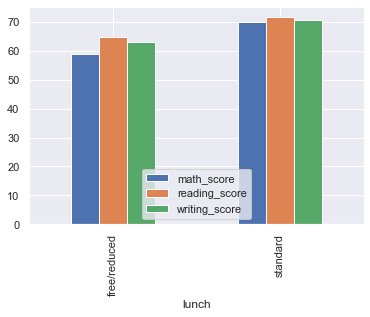

In [61]:
lunch_group.plot.bar()

The students with standard fee lunch tend to get high scores than free/reduced. It makes sense because the student might come from stabil financial family.

In [62]:
preparation_group = data.groupby(by = 'test_preparation_course').mean()
preparation_group

,math_score,reading_score,writing_score
test_preparation_course,,,
completed,69.695531,73.893855,74.418994
none,64.077882,66.534268,64.504673


<AxesSubplot:xlabel='test_preparation_course'>

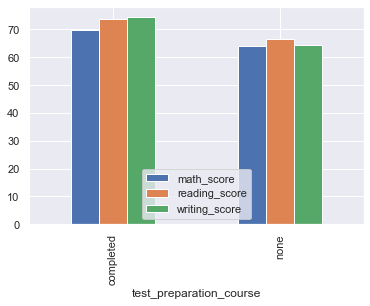

In [63]:
preparation_group.plot.bar()

As we know, students completed course tend to get high score than student who don't.

### Conclusion

- The ratio of male and female seem to be almost 1:1 with slightly more number of females
- Female student tend to get high score in writing and reading test while male student are good in math
- The 3 subjects score distribution are similiar. The score is around 40-90
- Student from group E have high score in all subjects
- The student who coming from high parental of educational level tend to get high score as well
- The student who pays more for lunch (standard) tend to get high score than who get free/reduced lunch. It makes sense because the student might coming from the stabil financial family
- The student completed test preparation course score more than who don't